# <span style="font-width:bold; font-size: 3rem; color:#1EB182;"><img src="images/icon102.png" width="38px"></img> **Hopsworks Feature Store** </span><span style="font-width:bold; font-size: 3rem; color:#333;">- Part 03: Model training</span>

<span style="font-width:bold; font-size: 1.4rem;">In this last notebook, we will train a model on the dataset we created in the previous tutorial. We can train our model using standard Python and machine learning frameworks such as Scikit-learn, PySpark, TensorFlow, and PyTorch.</span>

## 🗒️ This notebook is divided in 3 main sections:
1. Loading the training data.
2. Train models.
3. Model's Predictions Visualization.

![tutorial-flow](images/03_model.png)

---
## <span style="color:#ff5f27;"> 🔮 Connecting to Hopsworks Feature Store </span>

In [1]:
import hsfs

connection = hsfs.connection()

fs = connection.get_feature_store()

Connected. Call `.close()` to terminate connection gracefully.


---

## <span style="color:#ff5f27;">🪝 Feature View and Training Dataset Retrieval</span>

To retrieve training dataset from Feature Store we retrieve **Feature View** using `FeatureStore.get_feature_view()` method.

Then we can use **Feature View** in order to retrieve **training dataset** using `FeatureView.get_train_test_split()` method.

In [2]:
feature_view = fs.get_feature_view(
    name = 'electricity_data',
    version = 1
)

In [3]:
X_train, y_train, X_test, y_test = feature_view.get_train_test_split(
    training_dataset_version = 2
)

---

## <span style="color:#ff5f27;">🤖 Model Building</span>

### <span style="color:#ff5f27;">📝 Imports</span>

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.metrics import r2_score

### <span style="color:#ff5f27;">🧑🏻‍🔬 RandomForestRegressor</span>

In [5]:
model = RandomForestRegressor(
    n_estimators = 25,
    max_features = 'sqrt',
    n_jobs = -1,
    random_state = 42
)

model.fit(X_train.drop('date',axis = 1),y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=25, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [6]:
preds = model.predict(X_test.drop('date',axis = 1))

r2_score(y_test, preds)

0.9705573609125189

### <span style="color:#ff5f27;">🧑🏻‍🔬 XGBoost</span>

In [7]:
reg = xgb.XGBRegressor(
    n_estimators=25,
    random_state = 42
)

reg.fit(X_train.drop('date',axis = 1),y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=25, n_jobs=0,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=42, reg_alpha=0, ...)

In [8]:
preds = reg.predict(X_test.drop('date',axis = 1))

r2_score(y_test, preds)

0.9960749944300491

---

## <span style="color:#ff5f27;">🔬 🧬 Model Predictions Visualization</span>

In [9]:
X_test['preds'] = preds
X_train['target'] = y_train
X_train.date = pd.to_datetime(X_train.date)
X_test.date = pd.to_datetime(X_test.date)

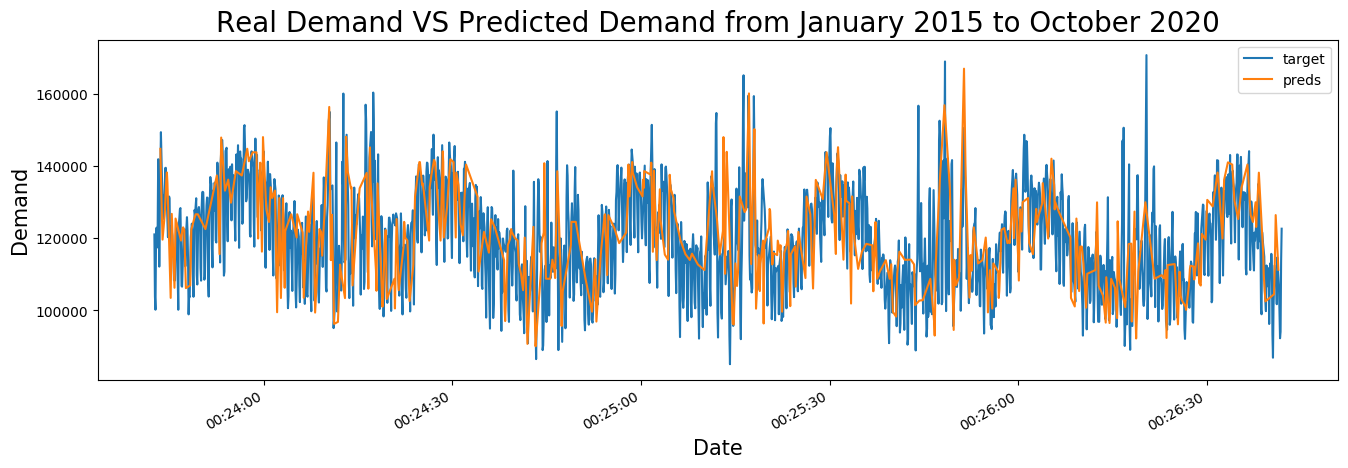

In [10]:
fig,ax = plt.subplots(figsize = (16,5))

X_train.plot('date','target', ax = ax)
X_test.plot('date','preds', ax = ax)

ax.set_xlabel('Date',fontsize = 15)
ax.set_ylabel('Demand',fontsize = 15)
ax.set_title('Real Demand VS Predicted Demand from January 2015 to October 2020',fontsize = 20)

plt.show()

---